In [2]:
import arviz as az
import pymc as pm
import preliz as pz
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
az.style.use("arviz-doc")

## 1) 
Usando PyMC reproducí los resultados del primer capítulo para el problema de la moneda. Usar los 3 priors usados en ese capítulo Beta(1, 1), Beta(0.5, 0.5), Beta(20, 20).

In [4]:
theta_real = 0.35
data = stats.bernoulli.rvs(p=theta_real, size=100)
data

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [5]:
sum(data)

30

In [6]:
with pm.Model() as beta_binomial_1:
    # prior
    theta = pm.Beta("theta", alpha=1, beta=1)
    # likelihood
    y = pm.Binomial("y", n=len(data), p=theta, observed=sum(data))

with pm.Model() as beta_binomial_05:
    # prior
    theta = pm.Beta("theta", alpha=0.5, beta=0.5)
    # likelihood
    y = pm.Binomial("y", n=len(data), p=theta, observed=sum(data))

with pm.Model() as beta_binomial_20:
    # prior
    theta = pm.Beta("theta", alpha=20, beta=20)
    # likelihood
    y = pm.Binomial("y", n=len(data), p=theta, observed=sum(data))

In [7]:
with beta_binomial_1:
    idata_1 = pm.sample(1000)

with beta_binomial_05:
    idata_05 = pm.sample(1000)

with beta_binomial_20:
    idata_20 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 21 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 21 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 20 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


<Axes: title={'center': 'theta'}>

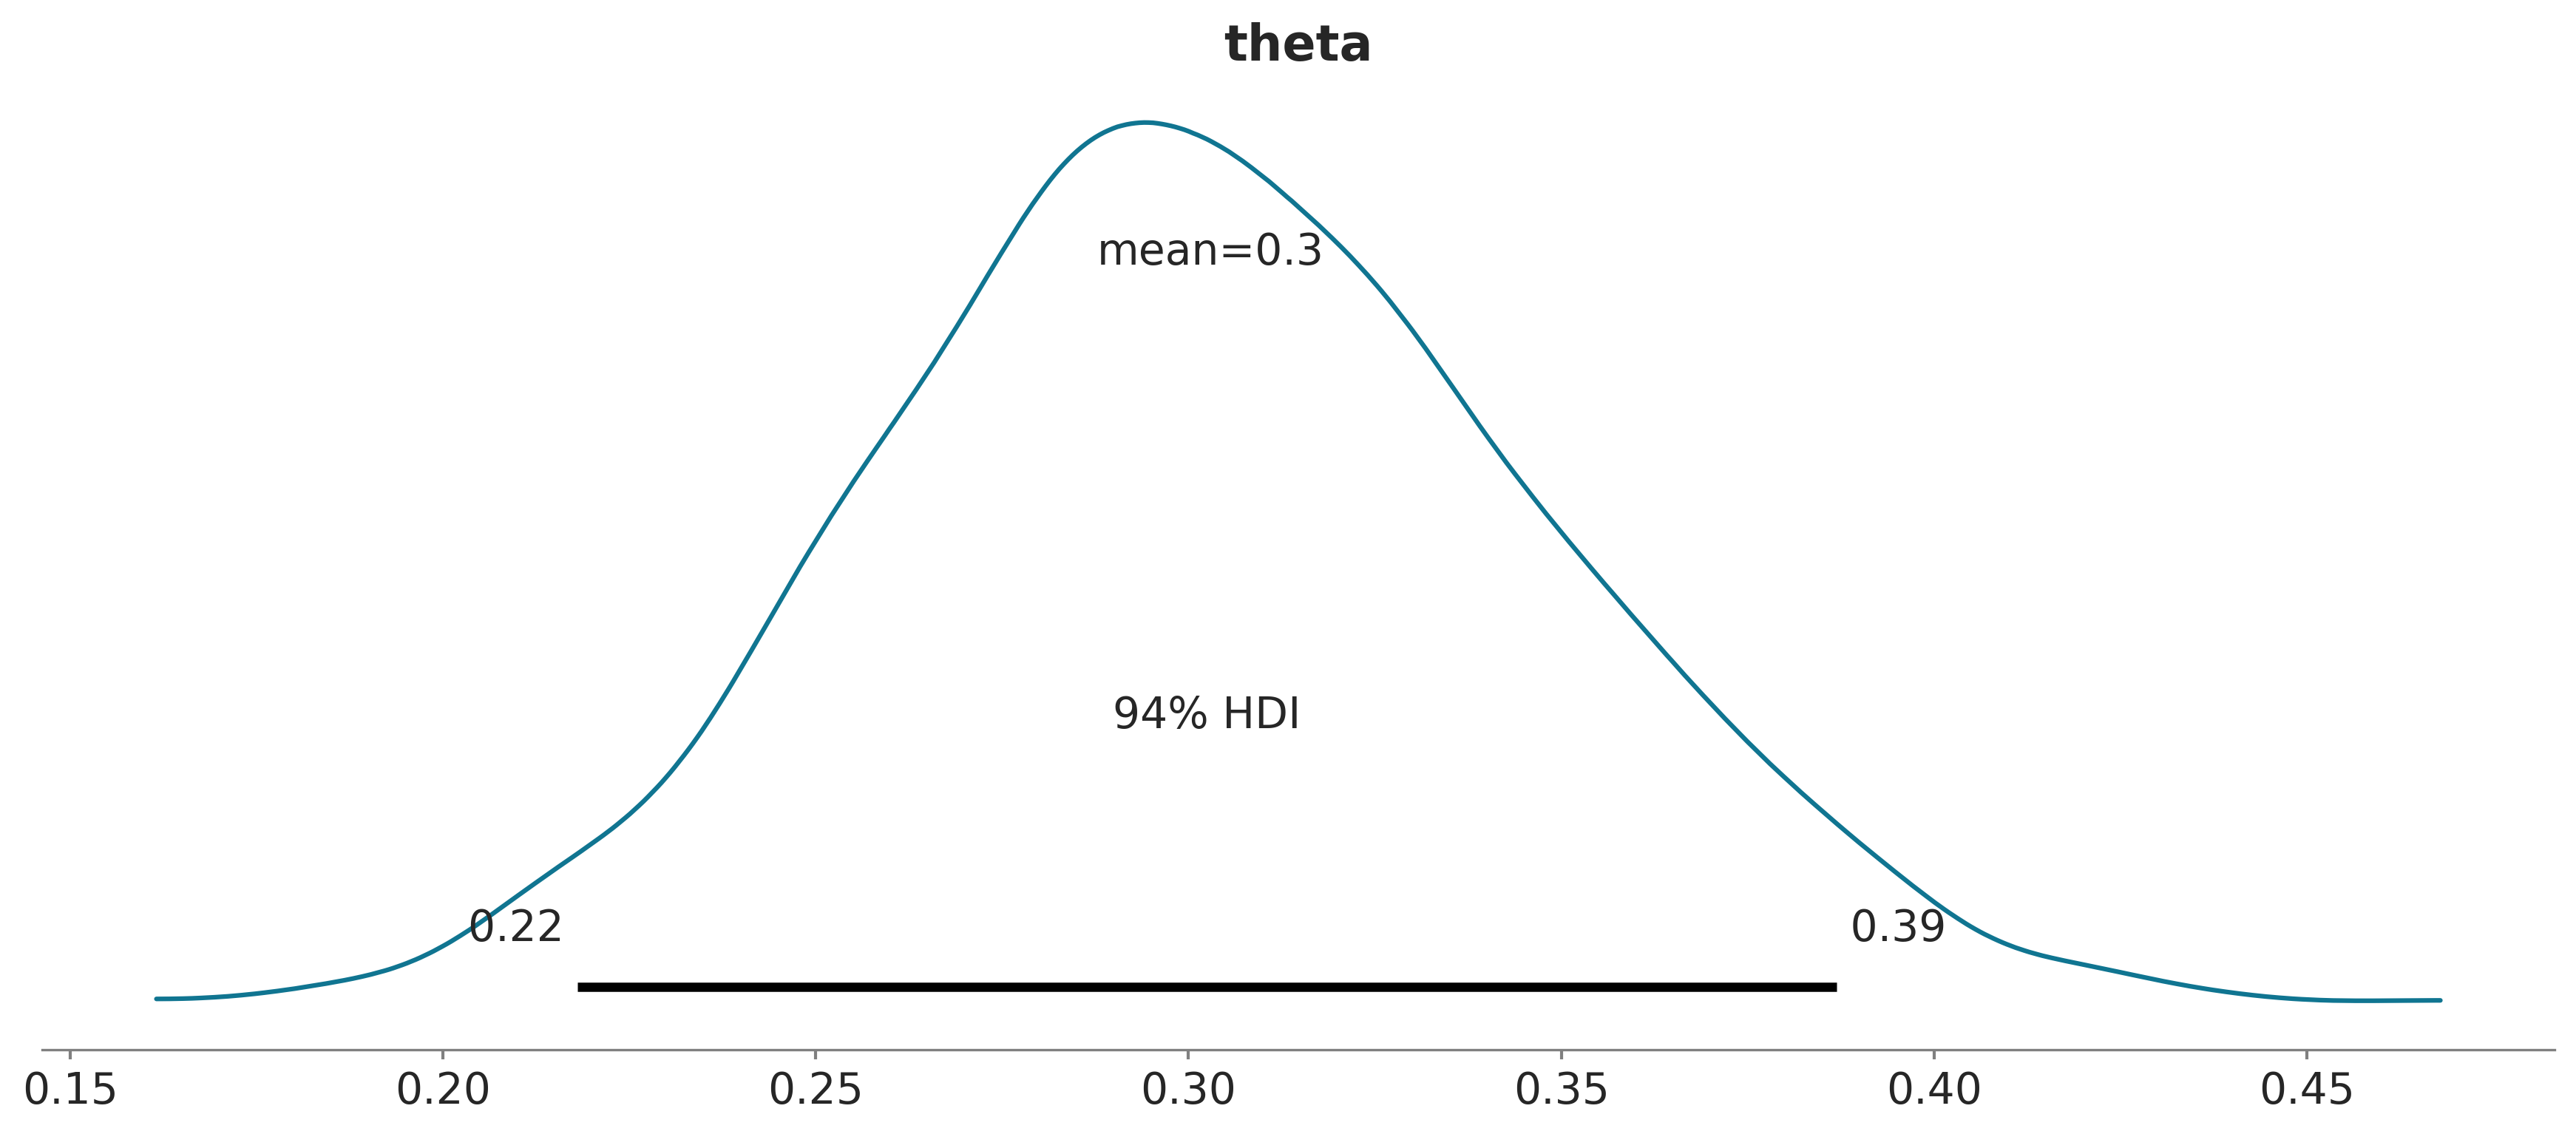

In [8]:
az.plot_posterior(idata_1)

<Axes: title={'center': 'theta'}>

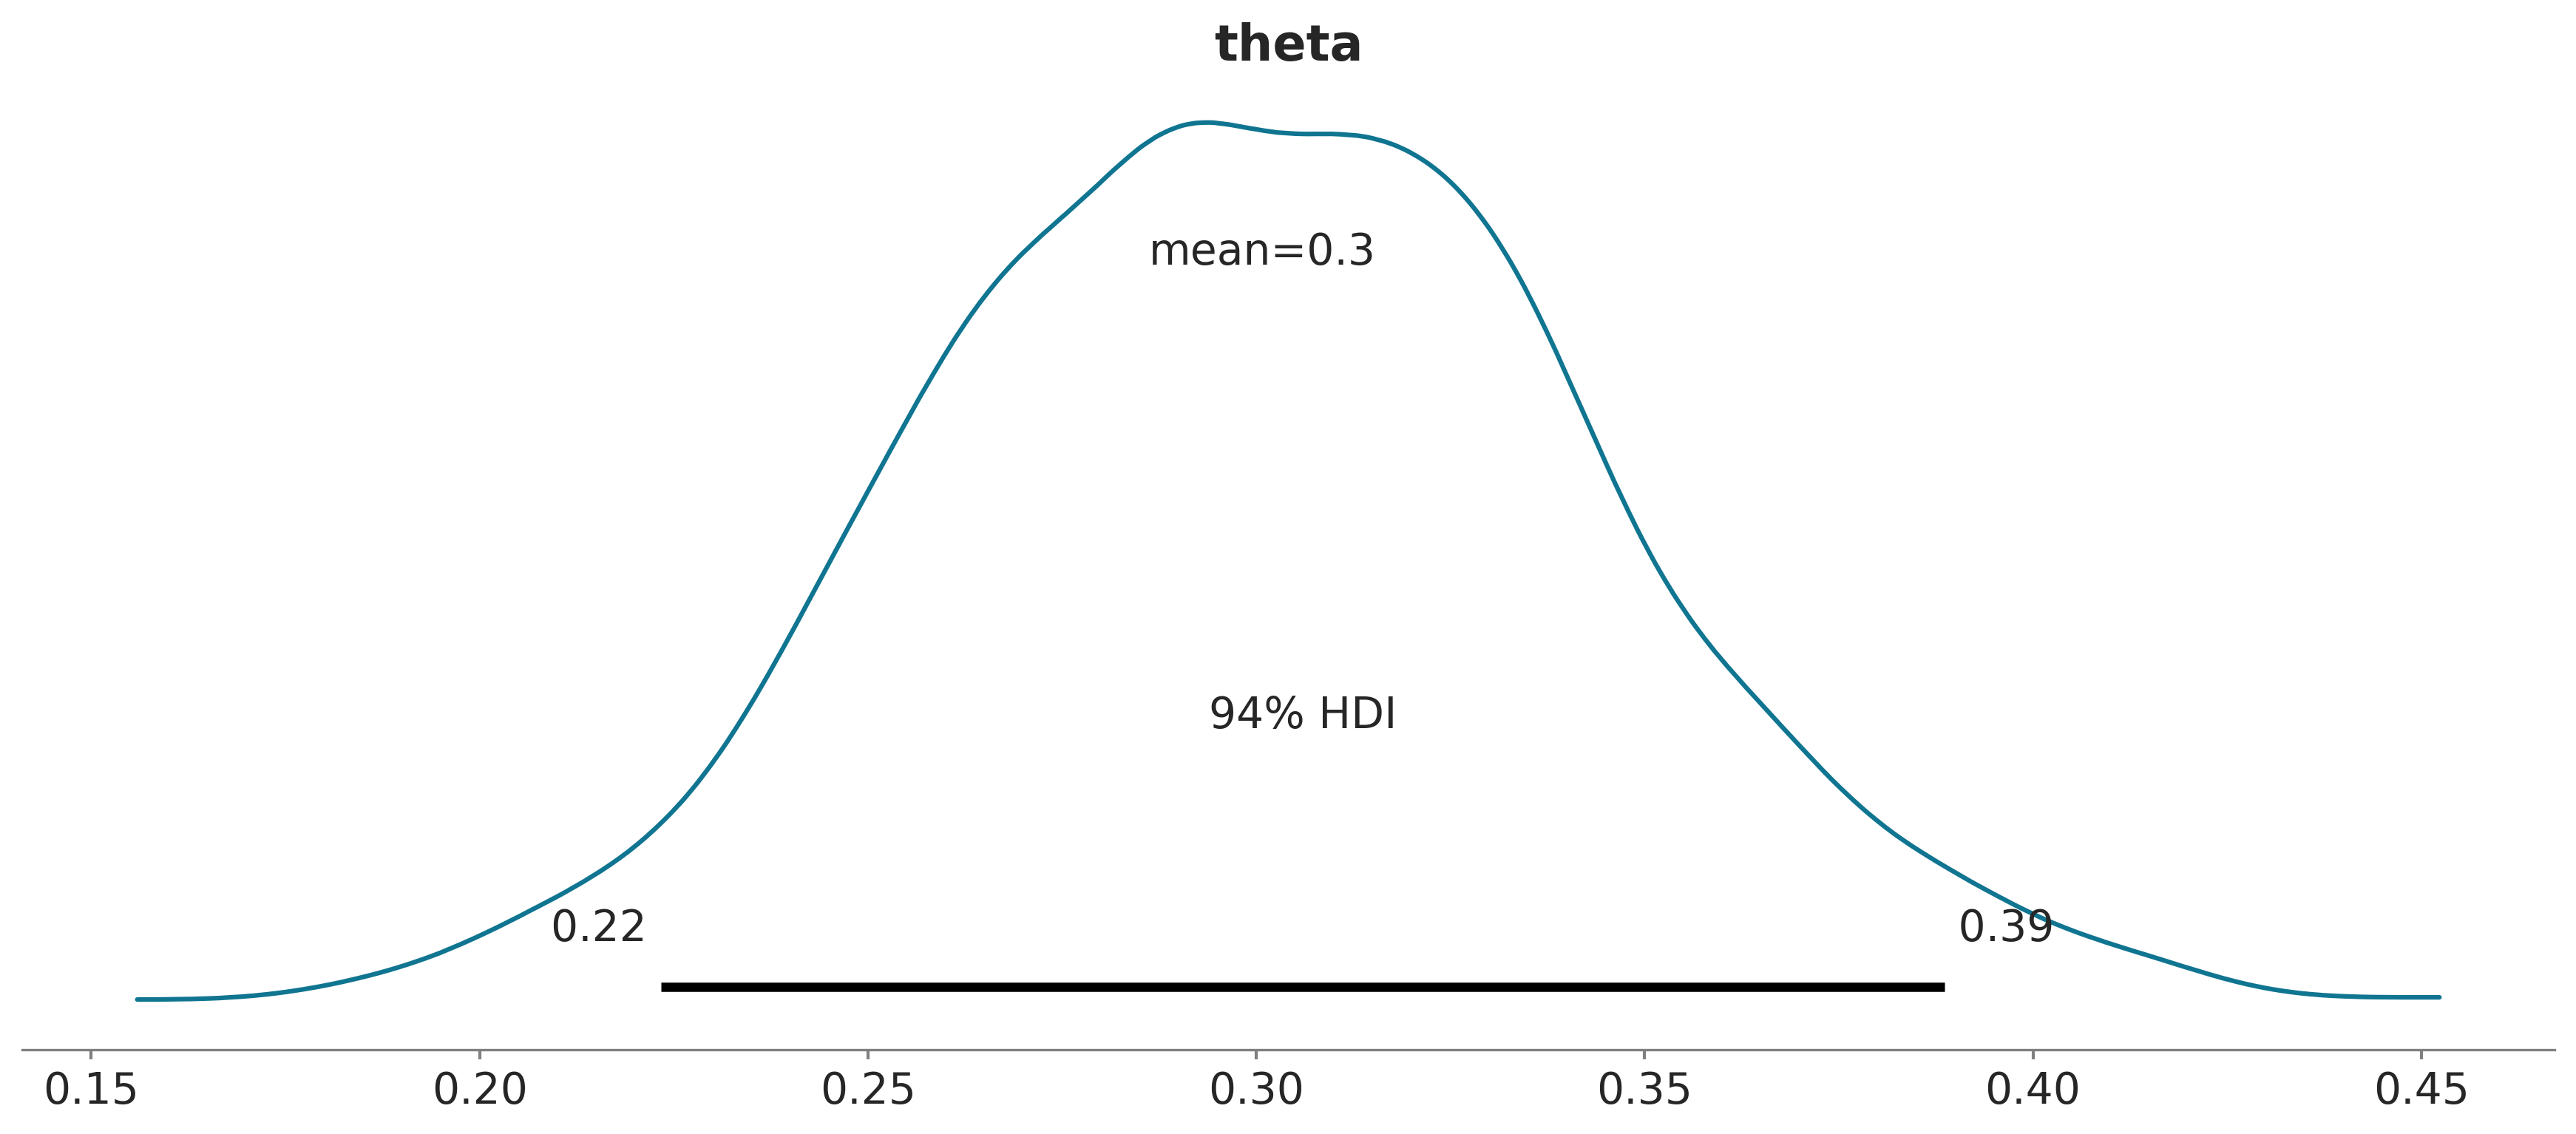

In [9]:
az.plot_posterior(idata_05)

<Axes: title={'center': 'theta'}>

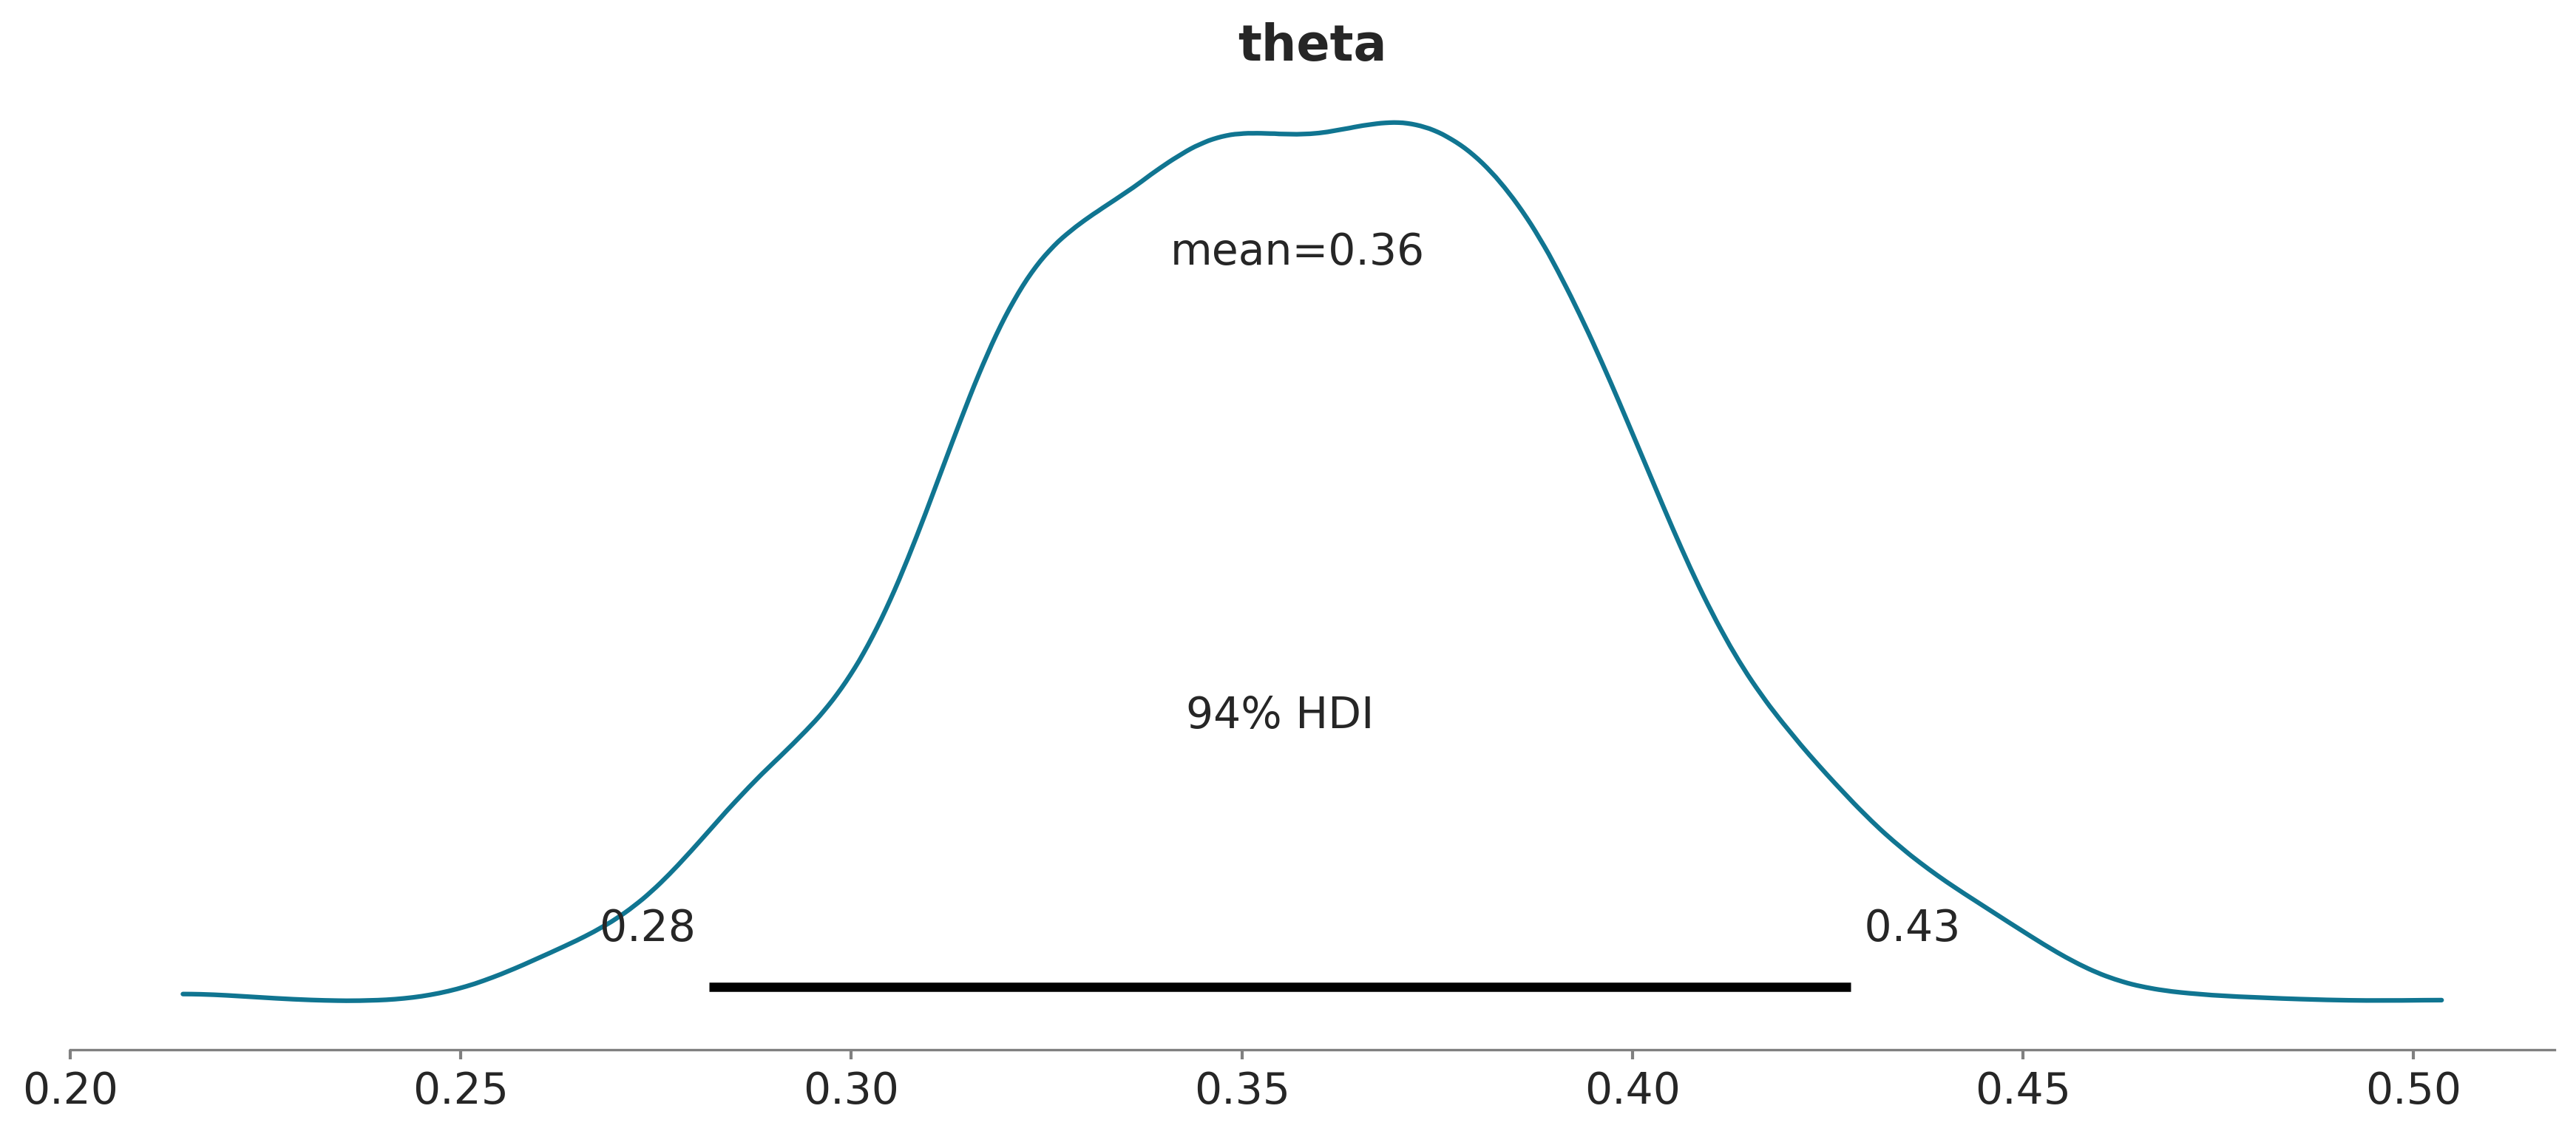

In [10]:
az.plot_posterior(idata_20)

## 2) 
Reemplazá la distribución Beta por una uniforme en el intervalo [0, 1] ¿Cómo cambia la velocidad del muestreo? ¿Y si usas un intervalo más ámplio, como [-3, 3]?

In [11]:
with pm.Model() as beta_binomial:
    # prior
    theta = pm.Beta("theta", 20, 20)
    # likelihood
    y = pm.Binomial("y", n=len(data), p=theta, observed=sum(data))

    idata = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Output()

Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 53 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Con Beta como prior tomó aproximadamente 29 segundos.

In [12]:
with pm.Model() as unif_binomial:
    # prior
    theta = pm.Uniform("theta", 0, 1)
    # likelihood
    y = pm.Binomial("y", n=len(data), p=theta, observed=sum(data))

    idata = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta]


Output()

Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 44 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


El sampleo tardó un poco más pero la diferencia no es importante.

In [13]:
with pm.Model() as unif_binomial:
    # prior
    theta = pm.Uniform("theta", -3, 3)
    # likelihood
    y = pm.Binomial("y", n=len(data), p=theta, observed=sum(data))

    idata = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\scalar\basic.py:2930: RuntimeWarning: invalid value encountered in log
  return np.log(x)
c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\scalar\basic.py:2930: RuntimeWarning: invalid value encountered in log
  return np.log(x)
c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\scalar\basic.py:2930: RuntimeWarning: invalid value encountered in log
  return np.log(x)
c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\scalar\basic.py:2930: RuntimeWarning: invalid value encountered in log
  return np.log(x)
c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-packages\pytensor\scalar\basic.py:2930: RuntimeWarning: invalid value encountered in log
  return np.log(x)
c:\Users\nazar\AppData\Local\Programs\Python\Python312\Lib\site-

Output()

Sampling 2 chains for 1_000 tune and 10_000 draw iterations (2_000 + 20_000 draws total) took 57 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
We recommend running at least 4 chains for robust computation of convergence diagnostics


Ahora sí que la diferencia es más significativa, además hay valores inválidos (ya que theta debe estar entre 0 y 1) en los que el sampler pierde el tiempo.

## 3)

Los modelos de PyMC tienen un método .to_graphviz() que se puede utilizar para visualizar el modelo (también existe la función pm.model_to_graphviz(). Use este método para visualizar nuestro_primer_modelo. Compare el resultado con el diagrama de Kruschke.

In [14]:
np.random.seed(123)
n_experimentos = 4
theta_real = .35
datos = pz.Binomial(1, theta_real).rvs(n_experimentos)

with pm.Model() as nuestro_primer_modelo:
    θ = pm.Beta('θ', alpha=1, beta=1)  # a priori
    y = pm.Bernoulli('y', p=θ, observed=datos)  # likelihood
    idata = pm.sample(1000)  # MCMC, motor de inferencia universal

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 20 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


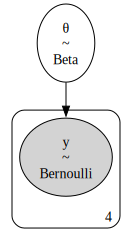

In [15]:
nuestro_primer_modelo.to_graphviz()

Es un diagrama de Kruschke. Nos informa que el _prior_ de $\theta$ es una distribución Beta y que la _likelihood_ es una Bernoulli, además el 4 en la esquina inferior derecha del recuadro de $y$ representa la cantidad de observaciones.

## 4)
En el modelo comparación_grupos que dimensión y tamaño tiene μ[idx] y σ[idx]? Justifique.

Creo que tienen dimensión igual a la cantidad de observaciones.  

$\mu$ y $\sigma$ tienen dimensión 4, una distribución por cada día.
A estas distribuciones las puedo llamar $\mu_1, \mu_2, \mu_3, \mu_4$ y lo mismo con las $\sigma$

Cuando le pasas un array X a un array Y como indice se devuelve un array con longitud igual a la del array Y con los valores indicados.  

Si supongo que idx = np.array([0,0,1]) entonces $\mu$[idx] = [$\mu_1$, $\mu_1$, $\mu_2$], por lo tanto la dimensión de $\mu$[idx] deberia ser igual a la longitud de idx que a su vez es igual a la cantidad de observaciones.

## 5)

La Gaussiana es una distribución sin límites es decir es válida en el intervalo $(-\infty, +\infty)$
, en el modelo comparación_grupos usamos una Gama como likelihood, pero podríamos haber usado una Gaussiana? Cambiarías tu respuesta si las propinas tomaran valores alrededor de 100 dolares?

En principio no usaría una Gaussiana ya que no tiene sentido pensar que las propinas puedan tener valores negativos.  
Si las propinas tuvieran valores alrededor de 100 entonces sí que podría usar una Gaussiana porque la probabilidad de los valores negativos es descartable, siempre que la desviacion estandar no sea muy grande.

## 6)
Calculá la probabilidad de superioridad directamente a partir de las muestras de la distribución a posteriori, es decir sin la expresión analítica. Cómo se comparan los resultados con los valores obtenidos analíticamente.

In [3]:
tips = pd.read_csv("../datos/propinas.csv")
categories = np.array(["Jue", "Vie", "Sab", "Dom"])

tip = tips["propina"].values
idx = pd.Categorical(tips["dia"], categories=categories).codes

coords = {"dias": categories, "dias_flat": categories[idx]}

with pm.Model(coords=coords) as comparing_groups:
    μ = pm.HalfNormal("μ", sigma=5, dims="dias")
    σ = pm.HalfNormal("σ", sigma=1, dims="dias")

    y = pm.Gamma("y", mu=μ[idx], sigma=σ[idx], observed=tip, dims="dias_flat")

    idata_cg = pm.sample()
    idata_cg.extend(pm.sample_posterior_predictive(idata_cg))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [μ, σ]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 2152 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [y]


Output()

In [22]:
posterior_samples = idata_cg.posterior_predictive["y"]
proba_sup_dict = {}

for i, dia1 in enumerate(categories):
    for j, dia2 in enumerate(categories):
        if i < j:
            tips_dia1 = posterior_samples.sel(dias_flat=dia1).values.flatten()
            tips_dia2 = posterior_samples.sel(dias_flat=dia2).values.flatten()

            samples_dia1 = np.random.choice(tips_dia1, size=1000, replace=True)
            samples_dia2 = np.random.choice(tips_dia2, size=1000, replace=True)

            proba_sup = np.mean(samples_dia1 > samples_dia2)

            key = f"{dia1} - {dia2}"
            proba_sup_dict[key] = proba_sup

for key, value in proba_sup_dict.items():
    print(f"{key}: {value:.2f}")


Jue - Vie: 0.51
Jue - Sab: 0.45
Jue - Dom: 0.35
Vie - Sab: 0.46
Vie - Dom: 0.41
Sab - Dom: 0.43


Los resultados son muy parecidos a los obtenidos usando la expresión analítica.

## 7)
Aplicá al menos uno de los modelos vistos en este capítulo a datos propios o de tu interés.

Voy a usar un modelo de comparacion de grupos.  
Elegí un dataset que vimos en al comienzo de la carrera, contiene data sobre el precio del seguro de vida segun distintos factores como la edad, la region, si el individuo es o no fumador, su BMI (body mass index), etc.  
Voy a calcular la media de `charges` para los grupos "Fumador/No Fumador - BMI >= 30/BMI<30". 

In [4]:
url = "https://github.com/nazarenomm/Estadistica_e_inferencia_II/raw/main/datos/insurance.csv"
df = pd.read_csv(url)

df['grupo'] = df.apply(lambda x: (
    'Fumador - BMI >= 30' if x['smoker'] == 'yes' and x['bmi'] >= 30 else
    'No Fumador - BMI < 30' if x['smoker'] == 'no' and x['bmi'] < 30 else
    'Fumador - BMI < 30' if x['smoker'] == 'yes' and x['bmi'] < 30 else
    'No Fumador - BMI >= 30'
), axis=1)

In [5]:
charges = df["charges"].values
categorias = df["grupo"].unique()
idx = pd.Categorical(df["grupo"], categories=categorias).codes

coords = {"grupo": categorias, "grupo_flat": categorias[idx]}

Escalo ``charges``, podría disminuir el tiempo de ejecución.

In [6]:
charges /= 1000

Usamos _priors_ no informativos para $\mu$ y $\sigma$ (aunque para determinar los limites miro los datos)

In [10]:
with pm.Model(coords=coords) as comparacion_grupos3:
    μ = pm.Uniform("μ", lower= 0, upper= 64, dims="grupo")
    σ = pm.Uniform("σ", lower= 10, upper=15, dims="grupo")

    y = pm.TruncatedNormal("y", mu=μ[idx], sigma=σ[idx], lower= 0 ,observed=charges, dims="grupo_flat")

In [11]:
with comparacion_grupos3:
    idata_cg = pm.sample()
    idata_cg.extend(pm.sample_posterior_predictive(idata_cg))

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [μ, σ]


Output()

Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 4289 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics
Sampling: [y]


Output()

array([<Axes: xlabel='y\nFumador - BMI < 30'>,
       <Axes: xlabel='y\nNo Fumador - BMI >= 30'>,
       <Axes: xlabel='y\nNo Fumador - BMI < 30'>,
       <Axes: xlabel='y\nFumador - BMI >= 30'>], dtype=object)

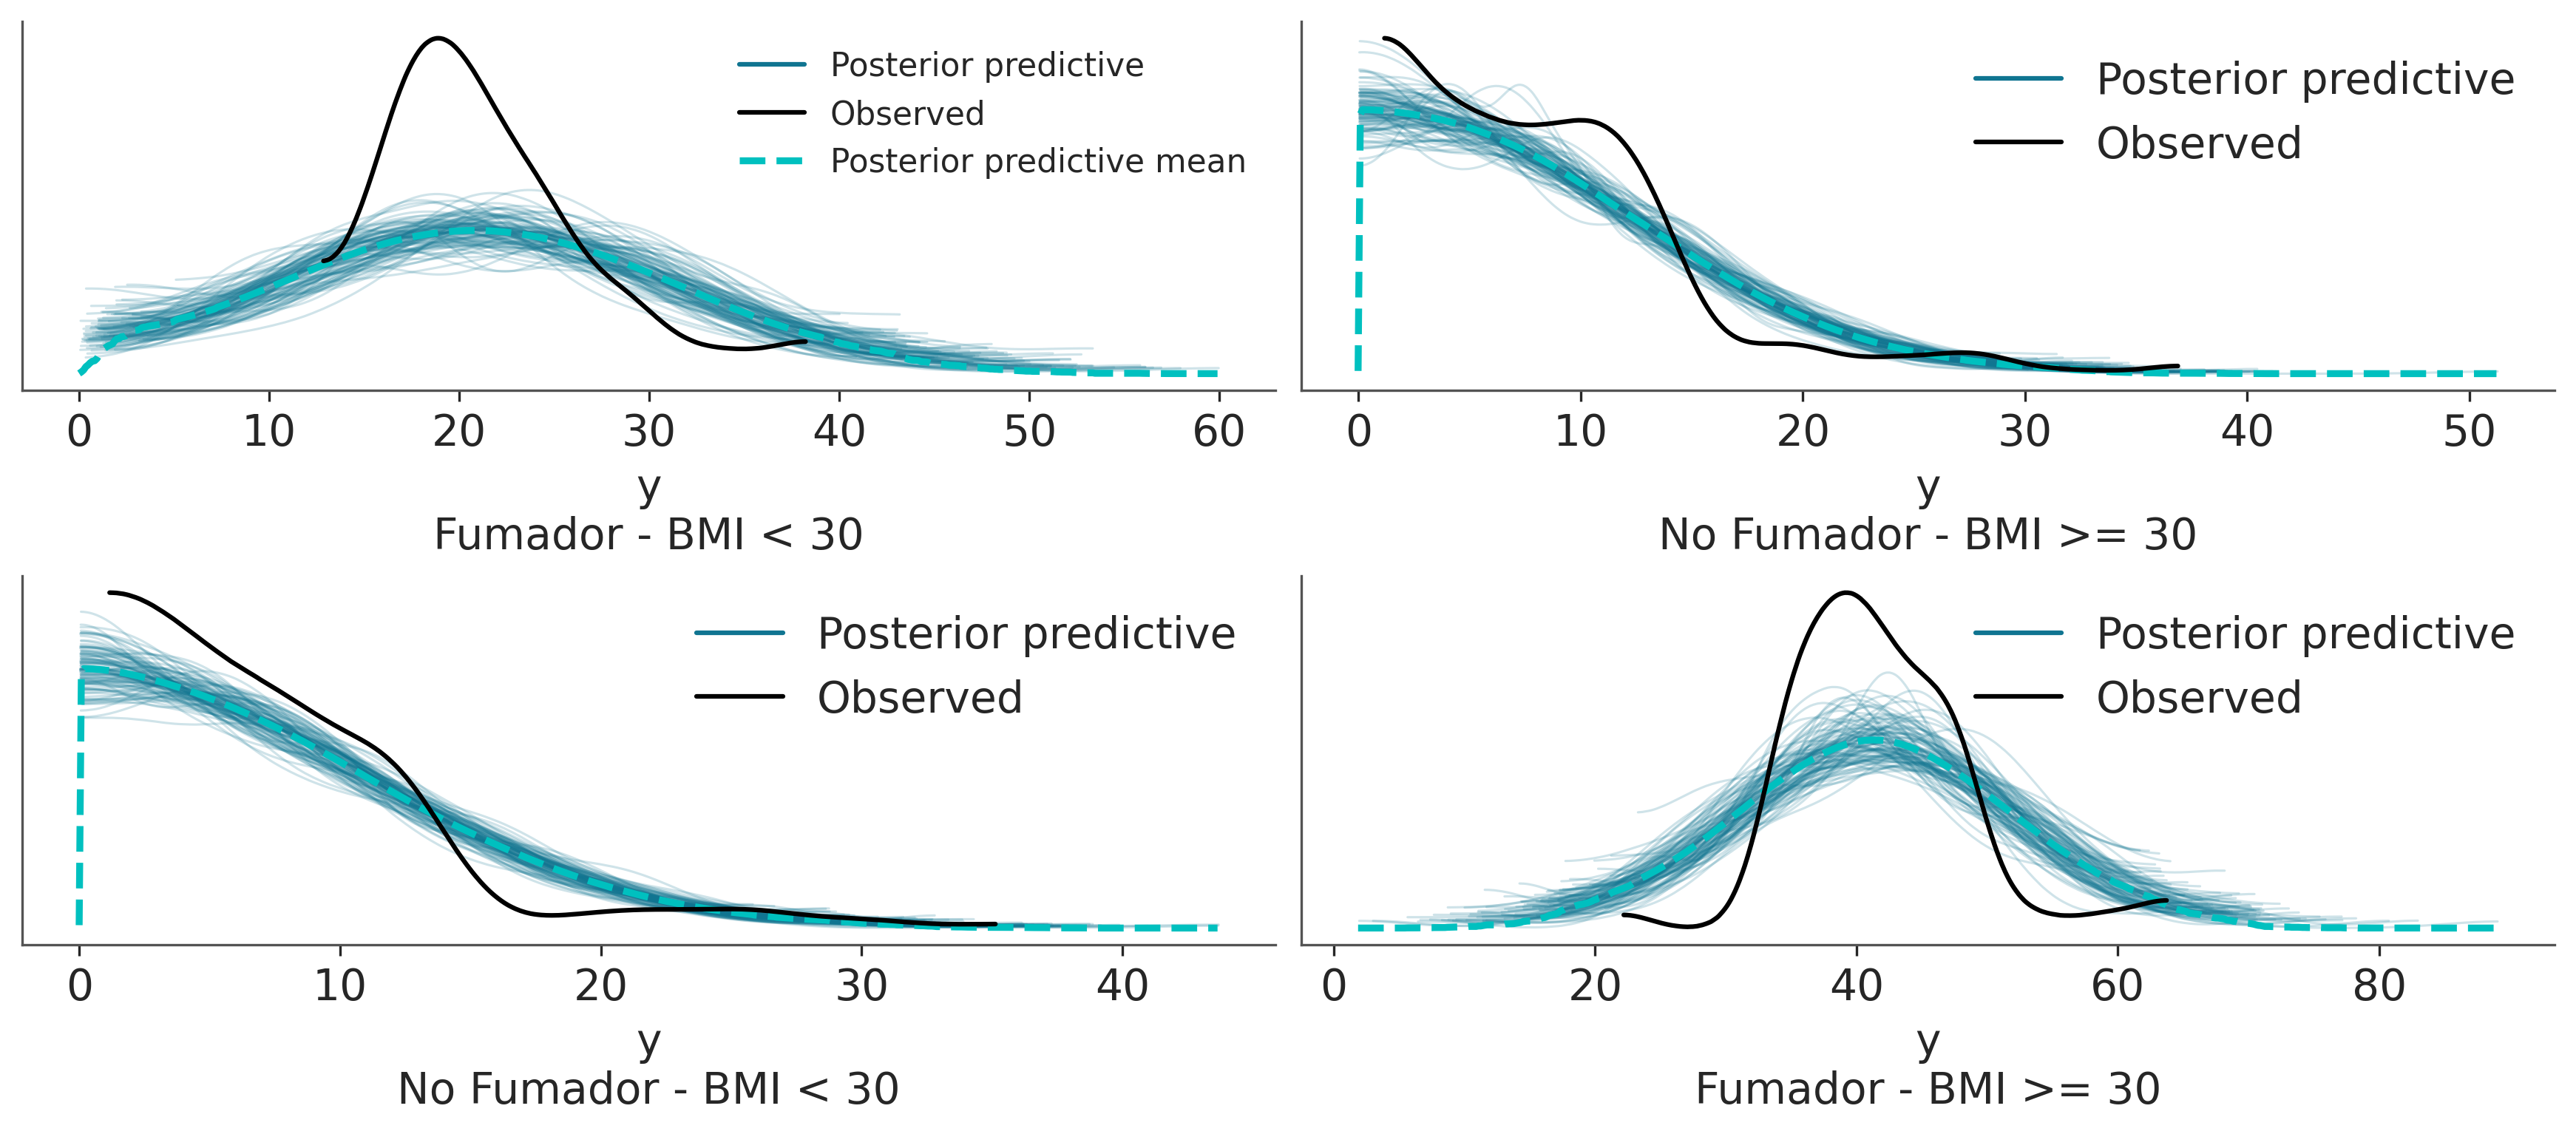

In [15]:
_, axes = plt.subplots(2, 2)
az.plot_ppc(
    idata_cg,
    num_pp_samples=100,
    coords={"grupo_flat": [categorias]},
    flatten=[],
    ax=axes,
)

Parece que se aproximó bastante a la forma de las distribuciones, quizás si hubiera agregado un _prior_ para ``lower`` y ``upper`` podría haber salido mejor.  
También hay otros factores que deben afectar el precio, como la cantidad de hijos o la edad.

array([<Axes: title={'center': 'μ\nFumador - BMI < 30'}>,
       <Axes: title={'center': 'μ\nNo Fumador - BMI >= 30'}>,
       <Axes: title={'center': 'μ\nNo Fumador - BMI < 30'}>,
       <Axes: title={'center': 'μ\nFumador - BMI >= 30'}>], dtype=object)

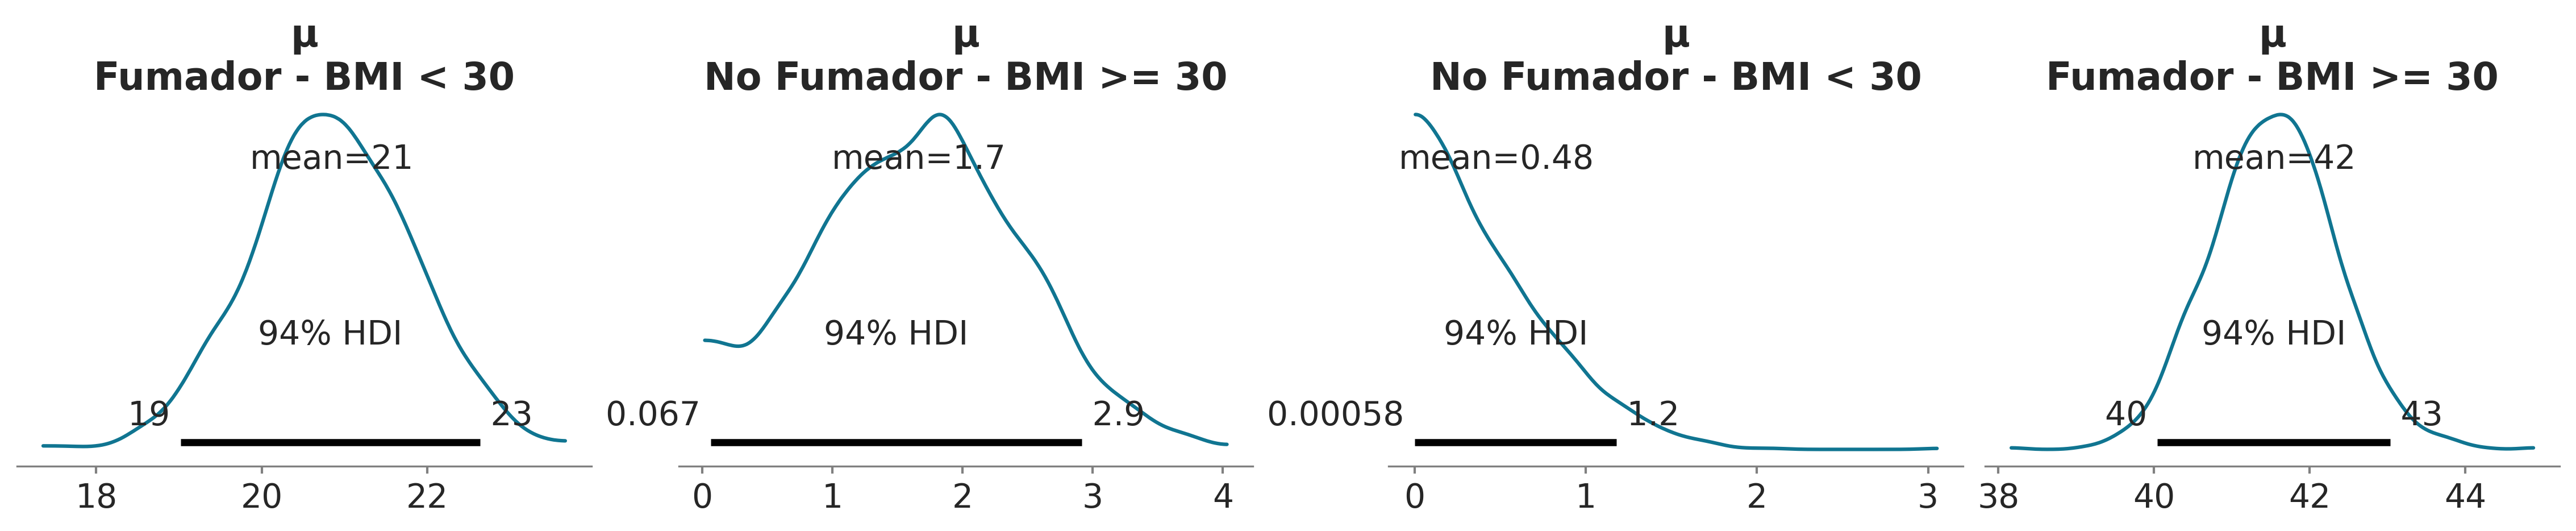

In [13]:
az.plot_posterior(idata_cg, var_names="μ", figsize=(15, 3))

Se puede ver diferencia entre todos los grupos, pero la diferencia entre fumadores y no fumadores es muy clara.  
Dentro de los fumadores se puede apreciar una gran diferencia también con respecto al BMI.  
Quizás los no fumadores deberian haber sido considerados como un grupo en conjunto.